In [10]:
import numpy as np ; import pandas as pd ; import matplotlib.pyplot as plt ; import seaborn as sns ; 

In [11]:
#import MINST dataset
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

C:\Users\firat\anaconda3\Lib\site-packages\sklearn\datasets\_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [12]:
X, y = mnist["data"], mnist["target"]
X.shape

(70000, 784)

In [ ]:
y.shape


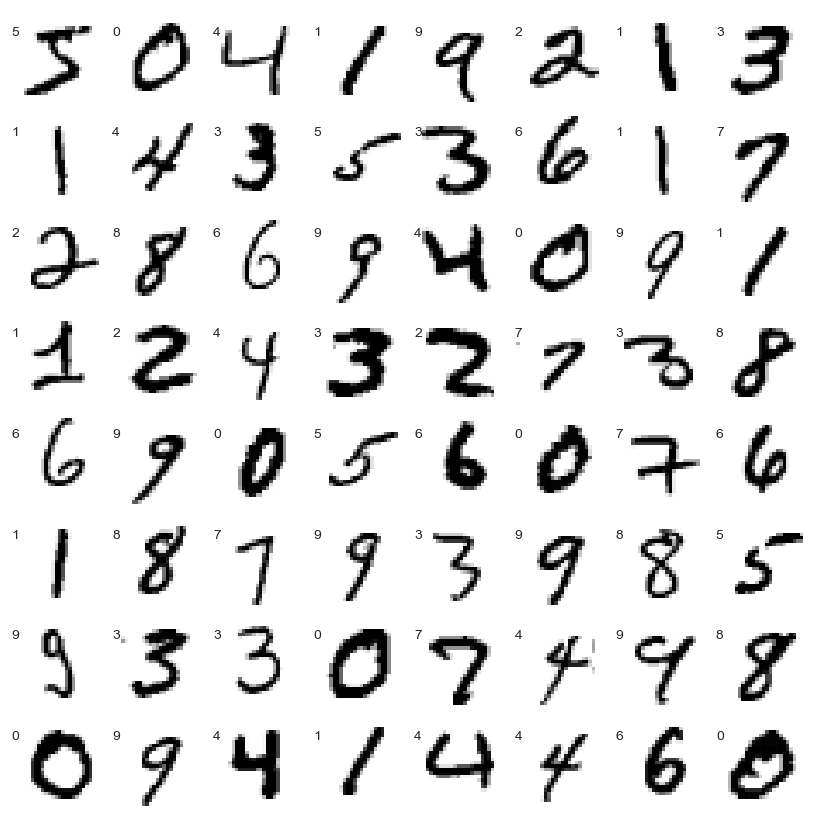

In [13]:
#Data Exploration

from matplotlib import pyplot as plt

fig = plt.figure(figsize=(8, 8))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# plot the digits: each image is 28x28 pixels

for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(X.values[i].reshape(28,28), cmap=plt.cm.binary, interpolation='nearest')
    
    # label the image with the target value
    ax.text(0, 7, str(y[i]))
    
plt.show()


In [14]:
 #Data Preprocessing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [18]:
#Training SVM classifier

from sklearn.svm import SVC

svm_clf = SVC(random_state=42, verbose=True, max_iter=1000,kernel='rbf')
svm_clf.fit(X_train, y_train)

#random_state=42, verbose=True, max_iter=1000,kernel='rbf', C=10, gamma=0.001 --> 0.130 accuracy

#random_state=42, verbose=True, max_iter=1000,kernel='rbf' --> 0.979 accuracy




[LibSVM]

C:\Users\firat\anaconda3\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


SVC(max_iter=1000, random_state=42, verbose=True)

In [19]:

#Predicting the test set
y_pred = svm_clf.predict(X_test)
    

In [20]:
#Model evaluationx
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("Accuracy: ", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix: \n", confusion_matrix(y_test, y_pred))
print("\nClassification Report: \n", classification_report(y_test, y_pred))




Accuracy:  0.9765

Confusion Matrix: 
 [[1329    1    3    0    1    2    2    1    4    0]
 [   0 1585    4    3    1    0    0    4    2    1]
 [   3    4 1346    3    3    2    4    8    6    1]
 [   0    2   11 1387    2   10    1    9    7    4]
 [   1    0    2    0 1270    0    3    3    2   14]
 [   0    1    2   14    2 1237    9    1    7    0]
 [   1    0    0    0    4    4 1384    0    3    0]
 [   1    6   12    1    5    0    0 1465    1   12]
 [   2    6    8   12    4    9    6    4 1303    3]
 [   5    8    2    8   14    2    0   11    5 1365]]

Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1343
           1       0.98      0.99      0.99      1600
           2       0.97      0.98      0.97      1380
           3       0.97      0.97      0.97      1433
           4       0.97      0.98      0.98      1295
           5       0.98      0.97      0.97      1273
           6       0.98  

In [ ]:
#Hyperparameter tuning


 #So long as the model is not overfitting, the best hyperparameters are those that maximize the accuracy of the model.

 
 #Grid Search Cross Validation is used to find the best hyperparameters for the model, but it is computationally expensive. 
 
 #Randomized Search Cross Validation is used to find the best hyperparameters for the model and it is less computationally expensive than Grid Search Cross Validation. Maybe ?? idk >:(
    
    

In [ ]:

import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(10, 10))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette='viridis')
plt.title('PCA')
plt.show()


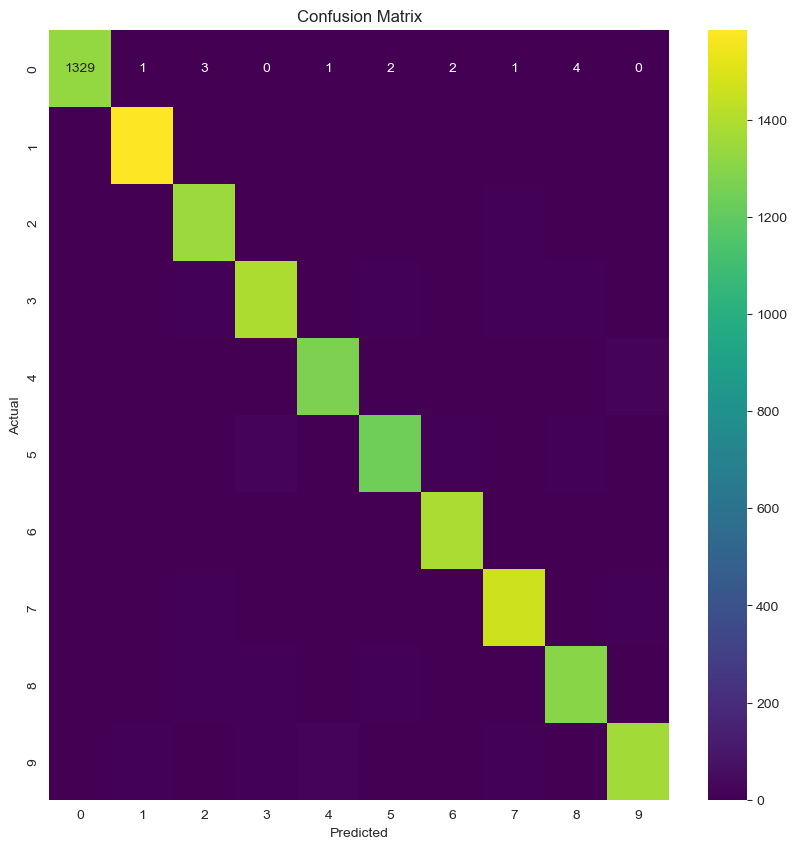

In [24]:
#Visualizing the confusion matrix

from sklearn.metrics import confusion_matrix

conf_mx = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 10))

sns.heatmap(conf_mx, annot=True, fmt='d', cmap='viridis')

plt.xlabel('Predicted')

plt.ylabel('Actual')

plt.title('Confusion Matrix')

plt.show()


C:\Users\firat\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


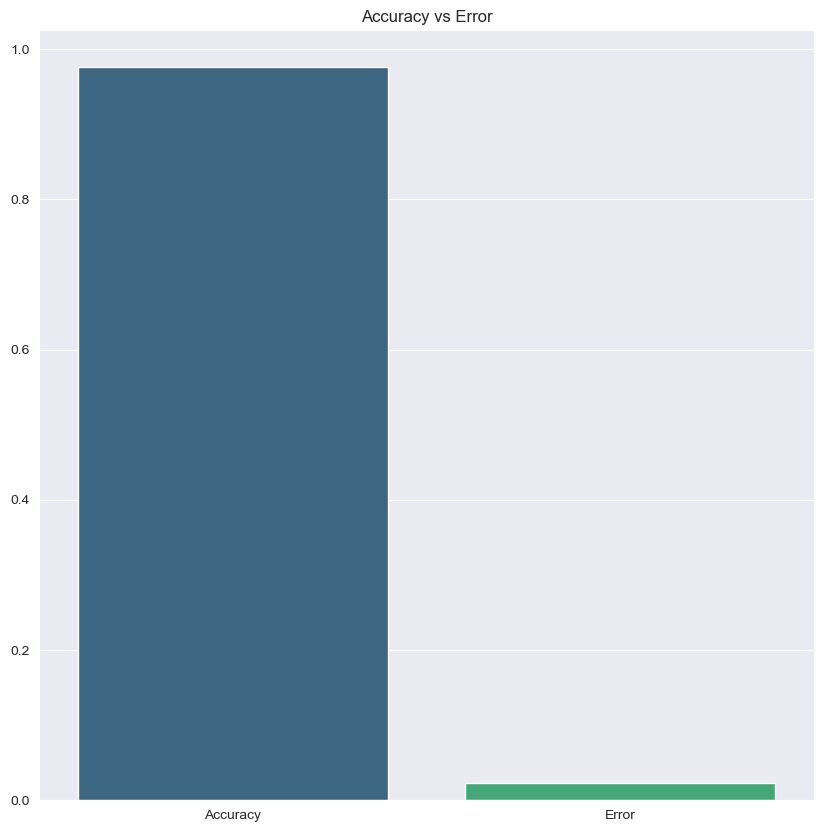

In [38]:
#Visualizing the accuracy of the model

from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)

plt.figure(figsize=(10, 10))

sns.barplot(x=['Accuracy', 'Error'], y=[accuracy, 1-accuracy], palette='viridis')

plt.title('Accuracy vs Error')

plt.show()





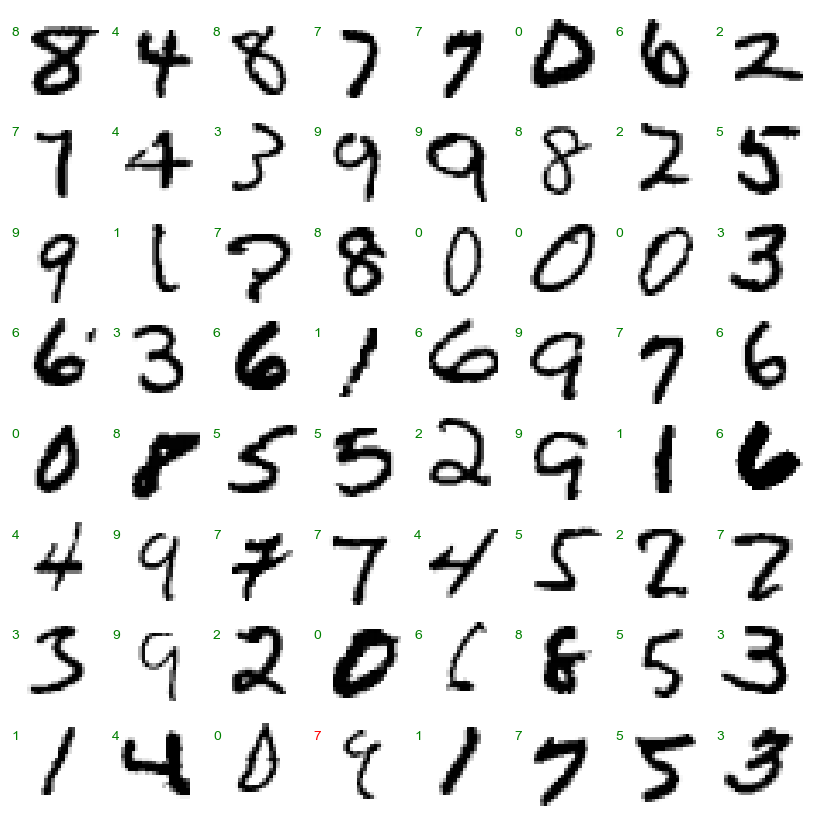

In [37]:
#Visualizing results of the model

fig = plt.figure(figsize=(8, 8))

fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(X_test.values[i].reshape(28,28), cmap=plt.cm.binary, interpolation='nearest')
    
    # label the image with the target value
    if y_test.iloc[i] == y_pred[i]:
        ax.text(0, 7, str(y_pred[i]), color='green')
    else:
        ax.text(0, 7, str(y_pred[i]), color='red')
        
        
plt.show()



